<a href="https://colab.research.google.com/github/aaoiii/2024-ESAA-OB/blob/main/2%EC%A3%BC%EC%B0%A8_%ED%95%B8%EC%A6%88%EC%98%A84%EC%9E%A5%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4. 모델 훈련

- 선형회귀
  - 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터 구하기
  ![Ch04_모델 훈련.png]()- 경사하강법 사용

- 다항회귀
- 과대적합 감지 by 학습 곡선
- 분류 : 로지스틱 회귀 / 소프트맥스 회귀

## 4.1 선형 회귀

- 선형 모델 : 입력 특성의 가중치 합과 편향을 더해 예측을 만든다
- 성능 측정 지표 : RMSE
  - RMSE를 최소화하는 세타 찾기

### 4.1.1 정규방정식
- 비용함수를 최소화하는 세타값을 찾기 위한 해석적인 방법


In [5]:
import numpy as np

X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

In [6]:
X_b=np.c_[np.ones((100,1)),X] # 모든 샘플에 x0=1을 추가한다
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[3.9208158 ],
       [2.96522374]])

In [8]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new] # 모든 샘플에 x0=1을 추가한다
y_predict=X_new_b.dot(theta_best)
y_predict

array([[3.9208158 ],
       [9.85126328]])

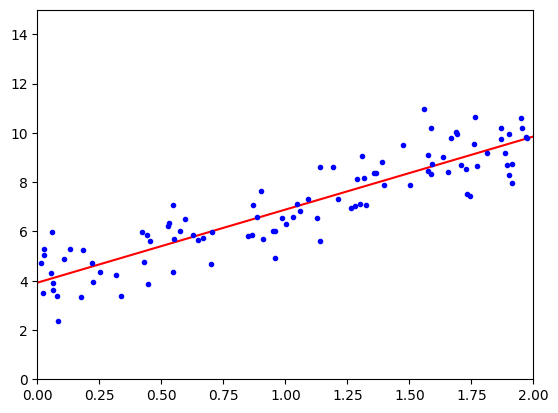

In [9]:
import matplotlib.pyplot as plt
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_
lin_reg.predict(X_new)

array([[3.9208158 ],
       [9.85126328]])

In [11]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[3.9208158 ],
       [2.96522374]])

In [12]:
# np.linalg.pinv() 함수로 유사역행렬을 직접 구할 수 있다
np.linalg.pinv(X_b).dot(y)

array([[3.9208158 ],
       [2.96522374]])

- 유사역행렬 자체는 특잇값 분해로 계산된다
- 훈련세트 행렬 X를 3개의 행렬 곱셈으로 분해

## 4.1.2 계산 복잡도

- 계산 복잡도 : O(n^2.4) ~ O(n^3)


## 4.2 경사 하강법

- 파라미터 벡터 세타에 대해 비용함수의 현재 그레이디언트를 계산하고 감소하는 방향으로 진행
- 무작위 초기화
- 하이퍼 파라미터 : 학습률
- 문제점 : 무작위 초기화 때문에 전역최솟값보다 덜 좋은 지역 최솟값에 수렴할 수도 있다
  - 선형회귀를 위한 MSE 비용함수는 두점을 선택해 선을 그어도 곡선이 겹치지 않는 볼록함수라서 지역최솟값이 없고 하나의 전역 최솟값만 있다 & 연속함수
  => 경사하강법이 전역 최솟값에 가깝게 접근할 수 있다

- 경사하강법을 사용할 때에는 모든 특성이 같은 스케일을 가져야한다!
- 파라미터 공간에서 파라미터 조합을 찾는 일 : 모델 훈련

## 4.2.1 배치 경사 하강법

- 편도함수 : 세타j가 조금 변경될 때 비용함수가 얼마나 바뀌는지 계산
- 배치 경사 하강법 : 매 스텝에서 훈련 데이터 전체를 사용한다

In [13]:
eta=0.1 # 학습률
n_iterations=1000
m=100

theta=np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta=theta-eta*gradients

In [14]:
theta

array([[3.9208158 ],
       [2.96522374]])

- 적절한 학습률을 찾으려면 그리드 탐색을 이용한다
- 반복횟수를 제한해야한다
  - 반복 횟수를 아주 크게 지정하고 그레디언트 벡터가 아주 작아지면(벡터 NORM이 허용오차보다 작아지면) 알고리즘 중지

## 4.2.2 확률적 경사 하강법

: 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산
  => 속도 훨씬 빠르다 & 매우 큰 훈련 세트도 훈련시킬 수 있다
- 확률적이기 때문에 불안정하다 (요동치면서 감소)
  => 지역 최솟값을 건너뛸 수도 있다
  - 지역 최솟값에서 탈출시켜서 좋지만 전역 최솟값에 다다르지 못하게 한다
  => 학습률을 점진적으로 감소시키기!
  (담금질 기법 알고리즘과 유사)
  => 학습 스케줄 : 매 반복에서 학습률 결정하는 함수

In [15]:
n_epochs=50
t0,t1=5,50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0/(t+t1)

theta=np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index=np.random.randint(m)
    xi=X_b[random_index:random_index+1]
    yi=y[random_index:random_index+1]
    gradients=2*xi.T.dot(xi.dot(theta)-yi)
    eta=learning_schedule(epoch*m+i)
    theta=theta-eta*gradients

In [16]:
theta

array([[3.9339124 ],
       [2.94344244]])

In [17]:
from sklearn.linear_model import SGDRegressor
# 최대 1000번 에포크동안 실행, 한 에포크에서 0.001보다 적게 손실이 줄어들 때까지 실행, 학습률 0.1
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [18]:
sgd_reg.intercept_,sgd_reg.coef_

(array([3.94733361]), array([3.00614249]))

## 4.2.3 미니배치 경사 하강법

- 미니배치라는 임의의 작은 샘플 세트에 대해 그레디언트 계산
- 행렬 연산에 최적화된 하드웨어, GPU를 사용해서 얻는 성능 향상
- 미니배치를 크게하면 SGD보다 덜 불규칙하게 움직인다
=> 미니배치 경사하강법이 SGD보다 최솟값에 더 가까이 도달 but 지역 최솟값에서 빠져나오기는 더 힘들수도 있다

## 4.3 다항 회귀

In [19]:
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]
X_poly[0]

array([2.93667051, 8.62403366])

In [21]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.97629869]), array([[0.97501796, 0.53720025]]))

## 4.4 학습 곡선



In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
  X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
  train_errors,val_errors=[],[]
  for m in range(1,len(X_train)):
    model.fit(X_train[:m],y_train[:m])
    y_train_predict=model.predict(X_train[:m])
    y_val_predict=model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
  plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="훈련 세트")
  plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="검증 세트")

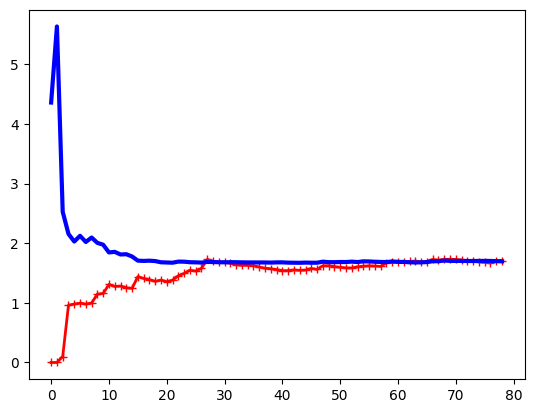

In [23]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)

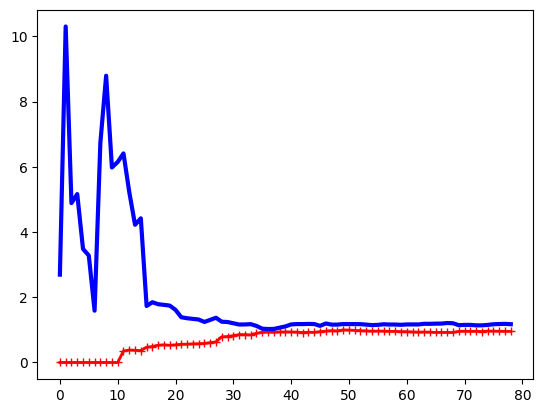

In [24]:
from sklearn.pipeline import Pipeline

polynomial_regression=Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression()),
])

plot_learning_curves(polynomial_regression,X,y)

- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다
- 두 곡선 사이에 공간이 있다. 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다(과대적합 모델의 특징)

- 과대 적합 모델을 개선하는 방법은 검증 오차가 훈련 오차에 근접할 때까지 많은 훈련 데이터를 추가하는 것!
- 편향/분산 트레이드오프
  - 편향이 큰 모델은 훈련데이터에 과소적합되기 쉽다
  - 모델의 복잡도가 커지면 분산이 늘어나고 편향이 줄어든다

  

## 4.5 규제가 있는 선형 모델

- 과대적합을 감소시키는 방법은 모델을 규제하는 것
- 자유도를 줄이면 데이터에 과대적합되기 어려워진다
=> 다항식의 차수 감소시키기


## 4.5.1 릿지 회귀
- 알파=0 : 선형 회귀와 같아진다
- 알파가 매우 크면 : 모든 가중치는 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 된다
모델의 분산은 줄지만 편향이 커진다

In [25]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1,solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])


array([[5.26460446]])

In [28]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.22740192])

## 4.5.2 라쏘 회귀

- 비용함수에 규제항을 더하지만 l2 노름의 제곱 /2 대신 가중치 벡터의 l1 노름을 사용
- 덜 중요한 특성의 가중치를 제거하려고 한다
- 자동으로 특성 선택을 하고 희소 모델을 만든다

<라쏘와 다른점>
1. 파라미터가 전역최적점에 가까워질수록 그레이디언트가 작아진다
2. 알파를 증가시킬수록 최적의 파라미터가 원점에 더 가까워진다 (완전히 0이 되지는 않는다)


- 라쏘의 비용함수는 세타=0 에서는 미분 불가능
  - 서브그레이디언트 벡터를 사용하면 경사하강법 적용 가능

In [31]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])


array([5.2271031])

## 4.5.3 엘라스틱넷

- 릿지 회귀 + 라쏘 회귀 절충
- 규제항은 릿지와 회귀의 규제항을 더해서 사용, 혼합 정도는 혼합비율 r을 사용해 조절
  - r=0 : 릿지회귀
  - r=1 : 라쏘회귀


- 릿지가 기보이 되지만 특성이 몇개뿐이라고 의심되면 라쏘나 엘라스틱넷이 낫다
- 특성 수가 훈련 샘플 수보다 많거나 특성 몇개가 강하게 연관되어 있으면 엘라스틱넷 선호

In [32]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.22658556])

## 4.5.4 조기종료

In [38]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2)

# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias = False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train.ravel())   # 훈련을 이어서 진행합니다
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

- warm_start=True : fit()메서드가 호출될 때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련을 이어간다

## 4.6 로지스틱 회귀

- 샘플이 특정 클래스에 속할 확률 추정 (양성 클래스, 음성 클래스) : 이진분류기

## 4.6.1 확률 추정

- 결괏값의 로지스틱 출력
- 로지스틱 : 0과 1 사이의 값을 출력하는 시그모이드 함수
- 로짓
- 로그 오즈

## 4.6.2 훈련과 비용함수

- 훈련의 목적 : 양성샘플(y=1)에 대해서는 높은 확률을 추정하고 음성 샘플에 대해서는 낮은 확률을 추정하는 모델의 파라미터 세타 찾기
- 로그 손실 : 전체 훈련 세트에 대한 비용함수는 모든 훈련 샘플의 비용을 평균
  - 볼록함수이므로 경사하강법이 전역 최솟값을 찾는 것 보장


## 4.6.3 결정 경계

In [39]:
from sklearn import datasets
iris=datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [40]:
X=iris["data"][:,3:] # 꽃잎의 너비
y=(iris["target"]==2).astype(int) # 1 Iris-Virginica면 1, 아니면 0

In [42]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

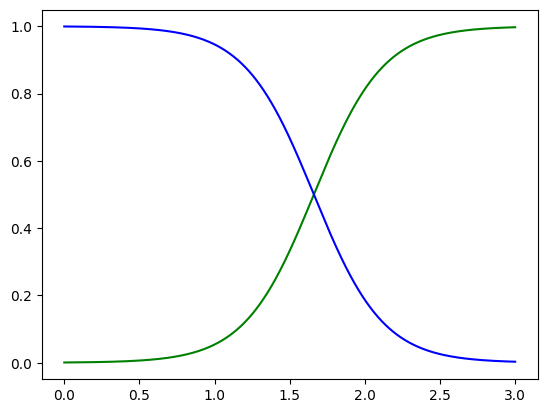

In [43]:
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],"g-",label="Iris virginica")
plt.plot(X_new,y_proba[:,0],"b-",label="Not Iris virginica")

- 양쪽의 확률이 똑같이 50%가 되는 1.6cm 근방에서 결정 경계가 만들어진다

In [44]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

- 사이킷런은 l2 패널티를 기본으로 한다

##4.6.4 소프트맥스 회귀

- 소프트맥스회귀 / 다항 로지스틱 회귀
- 각 클래스의 확률 추정
- 훈련 방법 : 크로스 엔트로피 비용함수를 최소화하는 것은 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제하는 것, 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 종종 사용

- 사이킷런의 LogisticRegression은 클래스가 둘 이상일 때 기본적으로 일대다(OvA)전략 사용
- multi_class 매개변수를 "multinomial" 로 바꾸면 소프트맥스 회귀 사용 가능
- 소프트맥스 회귀를 사용하려면 solver매개변수에 "lbfgs"같이 알고리즘 지정해야함

In [45]:
X = iris["data"][:, (2,3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [46]:
softmax_reg.predict([[5,2]])

array([2])

In [48]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])